# CatBoost:
CatBoost, kategorik değişkenlerle otomatik olarak başa çıkabilen, hızlı ve başarılı bir Gradient Boosting Machine (GBM) türevidir. Öne çıkan özellikleri şunlardır:

- Kategorik değişken desteği: CatBoost, kategorik değişkenleri otomatik olarak işler ve bu tür verilerle performansını optimize eder.
- Hızlı ve ölçeklenebilir CPU desteği: Büyük veri setleriyle hızlı bir şekilde çalışabilir.
- Daha başarılı tahminler: CatBoost, overfitting (aşırı öğrenme) riskini azaltan yenilikçi algoritmalar sayesinde yüksek doğruluk sağlar.
- Hızlı eğitim ve tahmin: Eğitim ve tahmin süreçlerinde hız avantajı sunar.

Rusya'nın ilk açık kaynaklı başarılı ML çalışması: CatBoost, Yandex tarafından geliştirilmiş ve dünya çapında popüler bir açık kaynaklı makine öğrenimi kütüphanesidir.

In [1]:
# kütüphaneler

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Veri setinin yüklenmesi
df = pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\machine learning\Doğrusal Olmayan Regresyon Modelleri\KNN ALgoritması\Hitters.csv")
df = df.dropna()  


dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])


y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
catb_model=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 136ms	remaining: 2m 15s
1:	learn: 431.3923642	total: 137ms	remaining: 1m 8s
2:	learn: 424.8820360	total: 138ms	remaining: 46s
3:	learn: 418.2514904	total: 139ms	remaining: 34.7s
4:	learn: 412.6394021	total: 140ms	remaining: 27.9s
5:	learn: 406.6247020	total: 142ms	remaining: 23.5s
6:	learn: 400.5321206	total: 143ms	remaining: 20.3s
7:	learn: 394.6683437	total: 145ms	remaining: 17.9s
8:	learn: 388.2496484	total: 146ms	remaining: 16.1s
9:	learn: 382.9448842	total: 147ms	remaining: 14.6s
10:	learn: 377.2600080	total: 149ms	remaining: 13.4s
11:	learn: 372.4829606	total: 150ms	remaining: 12.4s
12:	learn: 366.6823437	total: 151ms	remaining: 11.5s
13:	learn: 362.6076230	total: 152ms	remaining: 10.7s
14:	learn: 358.0107745	total: 154ms	remaining: 10.1s
15:	learn: 353.2802665	total: 155ms	remaining: 9.55s
16:	learn: 348.5646265	total: 156ms	remaining: 9.04s
17:	learn: 343.6407912	total: 158ms	remaining: 8.59s
18:	learn: 339.2363847	tota

In [5]:
y_pred=catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [6]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.1],
            "depth":[3,6,8]}

In [7]:
catb_cv_model=GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 733us	remaining: 146ms
1:	learn: 404.8723520	total: 2ms	remaining: 198ms
2:	learn: 387.4057666	total: 2.5ms	remaining: 164ms
3:	learn: 372.2801584	total: 3.02ms	remaining: 148ms
4:	learn: 358.9204229	total: 3.5ms	remaining: 136ms
5:	learn: 347.0083933	total: 3.95ms	remaining: 128ms
6:	learn: 336.0130818	total: 4.39ms	remaining: 121ms
7:	learn: 324.3923300	total: 4.86ms	remaining: 117ms
8:	learn: 314.8690957	total: 5.39ms	remaining: 114ms
9:	learn: 308.5075563	total: 5.84ms	remaining: 111ms
10:	learn: 298.8587285	total: 6.4ms	remaining: 110ms
11:	learn: 294.7655438	total: 6.87ms	remaining: 108ms
12:	learn: 288.0697862	total: 7.32ms	remaining: 105ms
13:	learn: 282.6697154	total: 7.86ms	remaining: 104ms
14:	learn: 277.6121667	total: 8.35ms	remaining: 103ms
15:	learn: 273.4383979	total: 8.88ms	remaining: 102ms
16:	learn: 269.1556201	total: 9.36ms	remaining: 101ms
17:	learn: 264.8098704	total: 9.88ms	r

In [8]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [9]:
catb_tuned=CatBoostRegressor(depth= 3, iterations= 200, learning_rate= 0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 2.3ms	remaining: 458ms
1:	learn: 404.8723520	total: 3.97ms	remaining: 393ms
2:	learn: 387.4057666	total: 6.38ms	remaining: 419ms
3:	learn: 372.2801584	total: 8.62ms	remaining: 422ms
4:	learn: 358.9204229	total: 10.5ms	remaining: 410ms
5:	learn: 347.0083933	total: 12.2ms	remaining: 394ms
6:	learn: 336.0130818	total: 13.1ms	remaining: 361ms
7:	learn: 324.3923300	total: 13.8ms	remaining: 332ms
8:	learn: 314.8690957	total: 14.5ms	remaining: 307ms
9:	learn: 308.5075563	total: 15ms	remaining: 286ms
10:	learn: 298.8587285	total: 15.6ms	remaining: 267ms
11:	learn: 294.7655438	total: 16.1ms	remaining: 252ms
12:	learn: 288.0697862	total: 16.9ms	remaining: 243ms
13:	learn: 282.6697154	total: 17.4ms	remaining: 231ms
14:	learn: 277.6121667	total: 17.8ms	remaining: 220ms
15:	learn: 273.4383979	total: 18.3ms	remaining: 211ms
16:	learn: 269.1556201	total: 18.8ms	remaining: 203ms
17:	learn: 264.8098704	total: 19.3ms	remaining: 195ms
18:	learn: 261.6700768	total: 19.8ms	rema

In [10]:
y_pred=catb_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [12]:
# değiken önem düzeyi

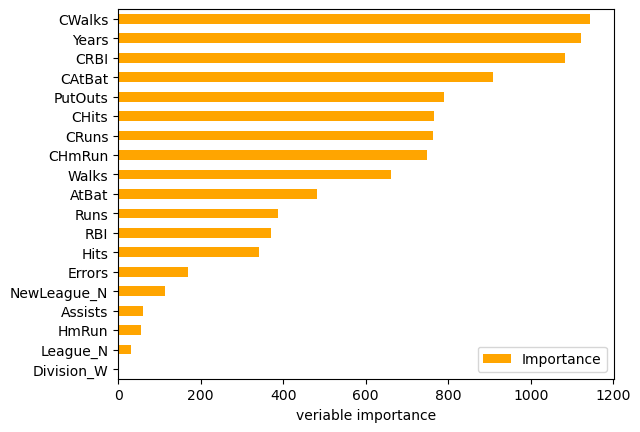

In [13]:
Importance=pd.DataFrame({"Importance":catb_tuned.feature_importances_*100},
                       index=X_train.columns)

Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="orange")

plt.xlabel("veriable importance")
plt.gca().legend=None